# Data Aggregation

* Data aggregation refers to summarizing or combining data, such as calculating statistics for different groups.

* Aggregating the data (if necessary) by grouping it and computing summary statistics for deeper insights.

* Comes under the broader umbrella of Data Manipulation (one of the step in process)

* Includes:
    - Aggregation
    - Grouping

# Creating a Random Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of rows
n = 10000

# Create a synthetic dataset
data = {
    'CustomerID': np.arange(1, n + 1),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Age': np.random.randint(18, 70, size=n),
    'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Groceries', 'Sports', 'Toys'], size=n),
    'AmountSpent': np.round(np.random.uniform(80, 50000, size=n), 2),
    'PaymentMethod': np.random.choice(['Credit Card', 'Debit Card', 'Cash', 'E-wallet'], size=n),
    'NumberOfItems': np.random.randint(1, 200, size=n)
}

# Create the DataFrame
sales_df = pd.DataFrame(data)
sales_df.head()


,CustomerID,Gender,Age,ProductCategory,AmountSpent,PaymentMethod,NumberOfItems
0,1,Male,68,Electronics,8926.52,Credit Card,127
1,2,Female,57,Toys,16353.82,Credit Card,95
2,3,Male,24,Electronics,27130.70,Credit Card,122
3,4,Male,49,Clothing,8577.11,E-wallet,186
4,5,Male,65,Electronics,1189.25,E-wallet,127


In [4]:
sales_df.shape

(10000, 7)

This is a shop sales data, with 10000 rows (observation) and 7 cols (features).

# Aggregation

## Column Wise

Aggregation function can be used to find insights into data. Though we can use `describe` too.

* Function includes:  
    - mean
    - std
    - sum
    - mode
    - variance



NOTE: All the above function works on numerical data , categorical data don't satisfy

In [8]:
# average age and amount spent
sales_df[['Age','AmountSpent', 'NumberOfItems']].mean().round(0)

Age                 43.0
AmountSpent      25133.0
NumberOfItems      100.0
dtype: float64

OBSERVATIONs
* Average age of buyer is 43 yrs
* On an average a customer spend Rs.25.133 per visit.
* On an average 100 items were bought.

Average seems to be low, lets see the median to find center

In [9]:
# median
sales_df[['Age','AmountSpent', 'NumberOfItems']].median().round(0)

Age                 43.0
AmountSpent      25219.0
NumberOfItems      100.0
dtype: float64

* Some people are spending large amount, so median and mean is getting low

In [10]:
# check standard deviation
sales_df[['Age','AmountSpent', 'NumberOfItems']].std().round(0)

Age                 15.0
AmountSpent      14327.0
NumberOfItems       58.0
dtype: float64

INTERPRETATIONS: (comparing: mean, median, & mode)

* Age: The relatively small standard deviation compared to the mean and median indicates that the ages of customers are clustered around the average age.

* Amount Spent: The large standard deviation indicates a significant spread in spending behavior, with the mean being considerably lower than the median due to a few high spenders.

* Number of Items: The high standard deviation suggests variability in purchasing behavior, which can have implications for inventory management and promotions.

In [13]:
# get sum of all values in specificed column
sales_df[['AmountSpent', 'NumberOfItems']].sum().round(0)

AmountSpent      251331141.0
NumberOfItems       995163.0
dtype: float64

In [16]:
# get mode
sales_df[['Age','AmountSpent', 'NumberOfItems']].mode().iloc[0]#first mode for each column

Age                30.0
AmountSpent      6315.2
NumberOfItems      81.0
Name: 0, dtype: float64

## Row Wise

In [19]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of students and subjects
num_students = 5
num_subjects = 4

# Create a DataFrame with random marks (e.g., out of 100)
data = np.random.randint(0, 101, size=(num_students, num_subjects))

# Random integers between 0 and 100
student_marks_df = pd.DataFrame(data, columns=[f'Subject{i+1}' for i in range(num_subjects)])

student_marks_df


,Subject1,Subject2,Subject3,Subject4
0,51,92,14,71
1,60,20,82,86
2,74,74,87,99
3,23,2,21,52
4,1,87,29,37


* Calculate mean marks across all subjects (row-wise).

* Calculate sum of all the marks across subjects

In [21]:
# finding mean row wise
student_marks_df.mean(axis = 1)

0    57.0
1    62.0
2    83.5
3    24.5
4    38.5
dtype: float64

In [22]:
# verification
(51+92+14+71)/4 # 1st value

57.0

In [23]:
# get sum
student_marks_df.sum(axis = 1)

0    228
1    248
2    334
3     98
4    154
dtype: int64

In [24]:
# verify
51+92+14+71

228

In [25]:
# check for variance across rows
student_marks_df.var(axis = 1)

0    1102.000000
1     914.666667
2     144.333333
3     425.666667
4    1283.666667
dtype: float64

# Grouping

3 Operation
* Split: Split dataframe into multiple smaller dataframe based on the key values

* Apply: Apply desired functions (aggregation / transformation / manipulation) on each dataframe

* Combine: Combine results from apply state into a dataframe

The three process combined is called map reduce and applied on very large datasets

<br>

<u>USAGE</u>

Group data based on one or more columns and then apply an aggregation function to summarize the data.

Reference Image: credits : cmdlinetips

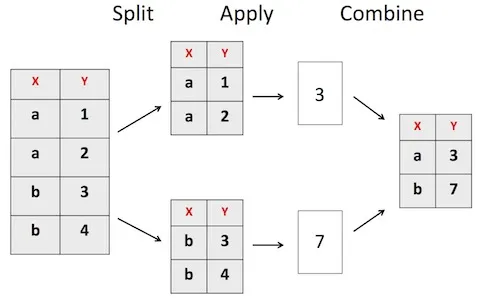


STEPS:
* Use the unique column value as key
* Apply `groupby` method
* Apply any aggregation function

In [26]:
new_sales_df = sales_df.copy()
new_sales_df.head()

,CustomerID,Gender,Age,ProductCategory,AmountSpent,PaymentMethod,NumberOfItems
0,1,Male,68,Electronics,8926.52,Credit Card,127
1,2,Female,57,Toys,16353.82,Credit Card,95
2,3,Male,24,Electronics,27130.70,Credit Card,122
3,4,Male,49,Clothing,8577.11,E-wallet,186
4,5,Male,65,Electronics,1189.25,E-wallet,127


In [29]:
# find mean amount spend by Males in purchasing
total_spent_by_gender = new_sales_df.groupby("Gender")['AmountSpent'].mean()

# Get the total amount spent by Males
total_spent_males = total_spent_by_gender.get('Female', 0)

# Display the result
int(total_spent_males)

24989

UNDERSTANDING CODE
* `new_sales_df.groupby("Gender")['AmountSpent'].mean()`

    1. We groupby gender on the **AmountSpent** column and calulate **mean**

    2. Store it in total_spent_by_gender - this will return a groupby object

* `total_spent_by_gender.get('Male', 0)`:
    
    1. we retrive the total spent by males.
    
    2. The second argument (0) ensures that if "Male" is not found, it returns 0 instead of raising an error.

    3. Stores it in **total_spent_males** variable

* `int(total_spent_males)` : We display the results
    
    

SYNTAX:
```
#1
var = df.groupby('col_name_for_grouping')

#2
var.aggregating operation
```


```
df.groupby('col_name_for_grouping')['col_name'].aggregate_operation

```

# Homework

Aggregation & Grouping + Past Lecture Content Usage

Navigate to the [homework link](https://gist.github.com/devloperhs14/d298bd4a84008613aa04d0634eabda7c) and use the code to generate a new dataset (use only once)

Then follow the instruction. Once done kindly answer the following questions in **comments**.

1. How many unique customers are there in the dataset? (refer documentation)

2. How many customers spent more than Rs. 300?

3. How much money did each gender spend in total?

4. What is the average age of customers for each product category?

5. How many customers visited each mall branch?

Answering format
```
1 - ans
2 - ans
...
```




# Resources

if I get enough coments, will make a seperate video on groupby!

* Reference Notebook: [Github](https://github.com/devloperhs14/practical_ml) - notebook name

* Pandas Groupby Documentation : [Explore methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

* Series Playlist: [Youtube](https://youtube.com/playlist?list=PLDfna1ApN44oZsHW1AAxoMkREFWOse7sV&feature=shared)

Thanks